# Sentiment Analysis of Airline Tweets

Our inspiration for this Case Study - https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

# 1. Data Exploration and Word Clouds

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Get our data
data_source_url = "kaggle_RC_2019-05.csv"
airline_tweets = pd.read_csv(data_source_url)

# View a sample of our dataset
airline_tweets

,subreddit,body,controversiality,score
0,gameofthrones,Your submission has been automatically removed...,0,1
1,aww,"Dont squeeze her with you massive hand, you me...",0,19
2,gaming,It's pretty well known and it was a paid produ...,0,3
3,news,You know we have laws against that currently c...,0,10
4,politics,"Yes, there is a difference between gentle supp...",0,1
...,...,...,...,...
999995,Pikabu,И ла и нет. Если жопа будет слишком сзади поте...,0,1
999996,Pikabu,"Исходя из этого, я тогда 3 раза все лайки инте...",0,2
999997,Pikabu,Человек из лиги ЛГБТ поди и не раз...,0,1
999998,Pikabu,"С Пикабу ушел,не для того что бы скрины читать",0,-5


In [3]:
# create a list of our conditions
conditions = [
    (airline_tweets['score'] <= -5),
    (airline_tweets['score'] > -5) & (airline_tweets['score'] < 5),
    (airline_tweets['score'] >= 5)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
airline_tweets['score_by_group'] = np.select(conditions, values)

# display updated DataFrame
airline_tweets.head()

,subreddit,body,controversiality,score,score_by_group
0,gameofthrones,Your submission has been automatically removed...,0,1,neutral
1,aww,"Dont squeeze her with you massive hand, you me...",0,19,positive
2,gaming,It's pretty well known and it was a paid produ...,0,3,neutral
3,news,You know we have laws against that currently c...,0,10,positive
4,politics,"Yes, there is a difference between gentle supp...",0,1,neutral


In [4]:

# apply normalization techniques by Column 1 
column = 'score_normalization'
airline_tweets[column] = (airline_tweets['score'] - airline_tweets['score'].min()) / (airline_tweets['score'].max() - airline_tweets['score'].min())	 

# view normalized data 
display(airline_tweets) 


,subreddit,body,controversiality,score,score_by_group,score_normalization
0,gameofthrones,Your submission has been automatically removed...,0,1,neutral,0.024378
1,aww,"Dont squeeze her with you massive hand, you me...",0,19,positive,0.024871
2,gaming,It's pretty well known and it was a paid produ...,0,3,neutral,0.024433
3,news,You know we have laws against that currently c...,0,10,positive,0.024625
4,politics,"Yes, there is a difference between gentle supp...",0,1,neutral,0.024378
...,...,...,...,...,...,...
999995,Pikabu,И ла и нет. Если жопа будет слишком сзади поте...,0,1,neutral,0.024378
999996,Pikabu,"Исходя из этого, я тогда 3 раза все лайки инте...",0,2,neutral,0.024406
999997,Pikabu,Человек из лиги ЛГБТ поди и не раз...,0,1,neutral,0.024378
999998,Pikabu,"С Пикабу ушел,не для того что бы скрины читать",0,-5,negative,0.024214


In [5]:
airline_tweets.subreddit.unique()

array(['gameofthrones', 'aww', 'gaming', 'news', 'politics', 'dankmemes',
       'relationship_advice', 'nba', 'worldnews', 'AskReddit',
       'AmItheAsshole', 'SquaredCircle', 'The_Donald', 'leagueoflegends',
       'hockey', 'videos', 'teenagers', 'gonewild', 'movies', 'funny',
       'pics', 'marvelstudios', 'memes', 'soccer', 'freefolk',
       'MortalKombat', 'todayilearned', 'apexlegends', 'asoiaf',
       'Market76', 'Animemes', 'FortNiteBR', 'nfl', 'trashy',
       'unpopularopinion', 'ChapoTrapHouse', 'RoastMe', 'Showerthoughts',
       'wallstreetbets', 'Pikabu'], dtype=object)

### Generating Word Clouds from our Tweets

In [6]:
text = " ".join(review for review in airline_tweets.body)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 167612666 words in the combination of all review.


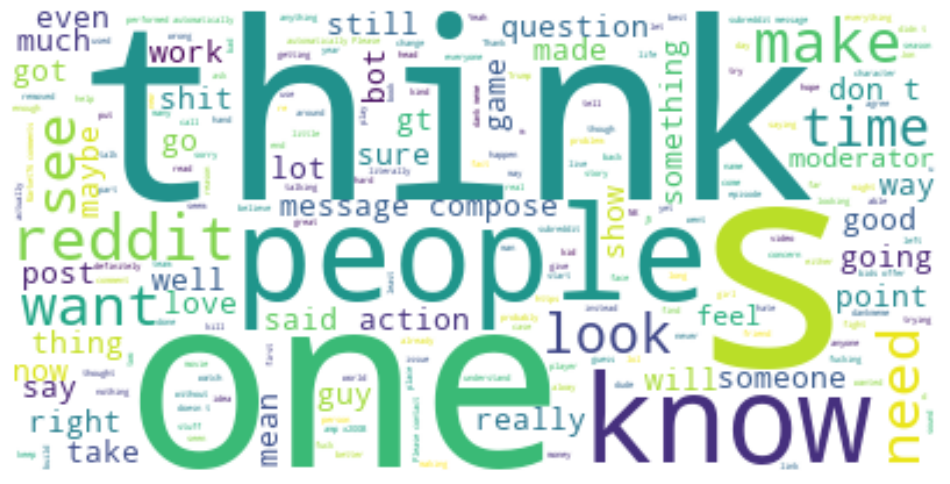

In [7]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display our Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

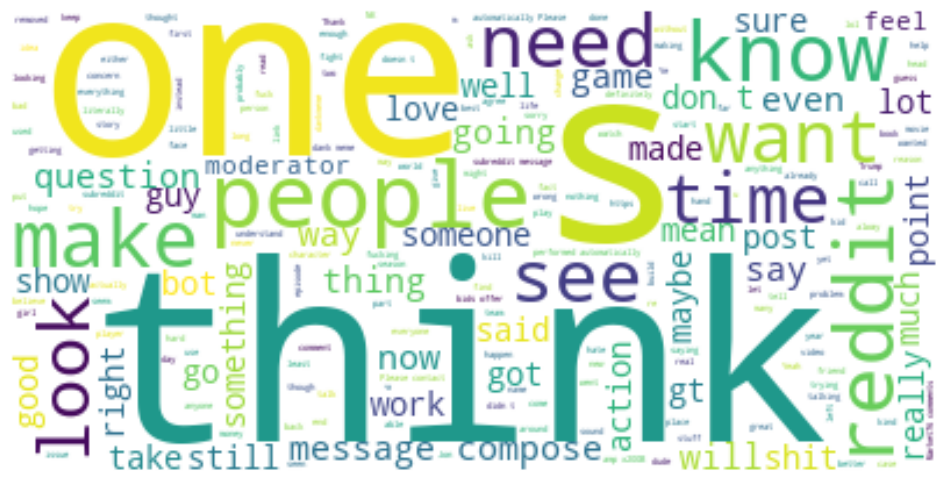

In [8]:
stopwords = set(STOPWORDS)

stopwords.update(["gaming"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display our Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Exploratory Analysis & Feature Extraction

6.4
4.8


<Axes: ylabel='count'>

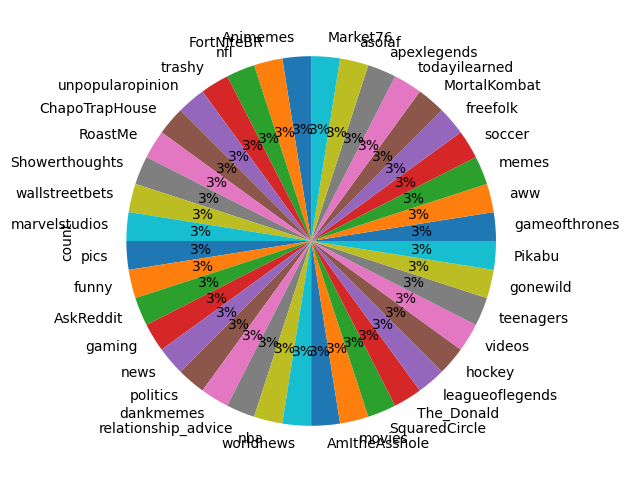

In [9]:
# Plot pie chart showing the airline split
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

airline_tweets.subreddit.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

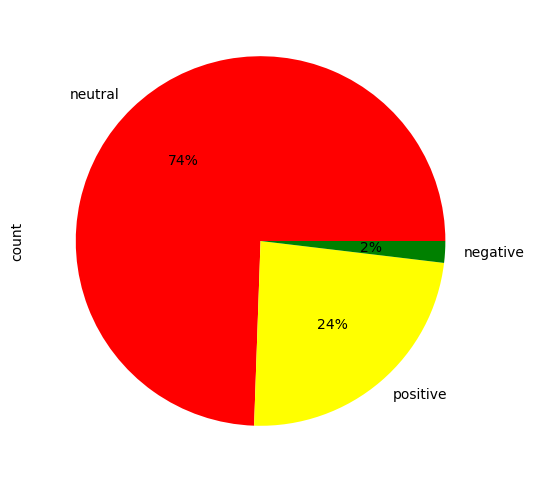

In [10]:
# Ratio of Negative to Neutral to Postive sentiments
airline_tweets.score_by_group.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [11]:
# Split of each airline
airline_sentiment = airline_tweets.groupby(['subreddit','score_by_group']).score.count().unstack()
airline_sentiment

score_by_group,negative,neutral,positive
subreddit,,,
AmItheAsshole,1064,17060,6876
Animemes,225,16379,8396
AskReddit,91,21423,3486
ChapoTrapHouse,582,11567,12851
FortNiteBR,377,20876,3747
Market76,3,24946,51
MortalKombat,333,20471,4196
Pikabu,340,15947,8713
RoastMe,42,22730,2228


<Axes: xlabel='subreddit'>

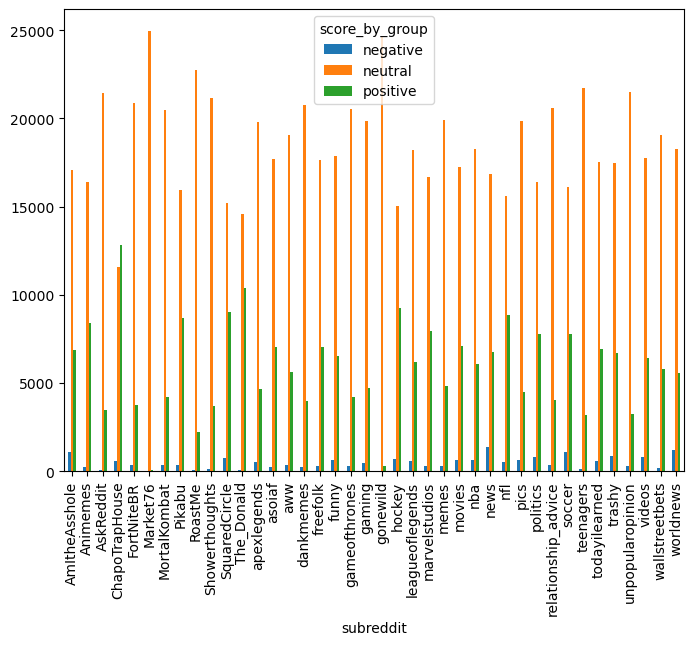

In [12]:
airline_sentiment.plot(kind='bar')

<Axes: xlabel='score_by_group', ylabel='score_normalization'>

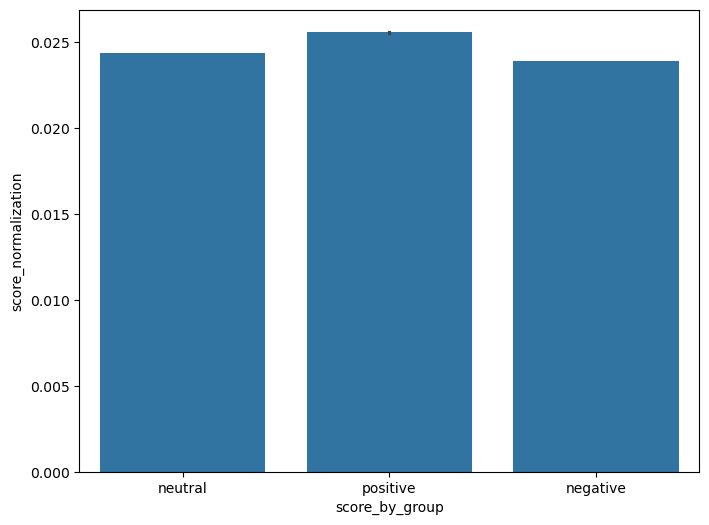

In [13]:
# Confident of our sentiment labels bing correctly labeled
# Remember a lot of 'sentiment' can be subjective, think sarcasm or slang
import seaborn as sns

sns.barplot(x='score_by_group', y='score_normalization' , data=airline_tweets)

### Feature Extraction

In [14]:
airline_tweets.head()

,subreddit,body,controversiality,score,score_by_group,score_normalization
0,gameofthrones,Your submission has been automatically removed...,0,1,neutral,0.024378
1,aww,"Dont squeeze her with you massive hand, you me...",0,19,positive,0.024871
2,gaming,It's pretty well known and it was a paid produ...,0,3,neutral,0.024433
3,news,You know we have laws against that currently c...,0,10,positive,0.024625
4,politics,"Yes, there is a difference between gentle supp...",0,1,neutral,0.024378


In [15]:
# Spliting the text and labels

# Our text lies in column 10 (11th column)
features = airline_tweets.iloc[:, 1].values

# Our labels lie in column 1 (2nd column)
labels = airline_tweets.iloc[:, 4].values

In [16]:
features

array(['Your submission has been automatically removed because all post titles must begin with one hard-bracketed spoiler scope tag, like [SPOILERS] or [NO SPOILERS]. Please review the options posted in the [spoiler guide](/r/gameofthrones/w/spoiler_guide) to find the title scope most appropriate for your post and [resubmit your content](/r/gameofthrones/submit).\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/gameofthrones) if you have any questions or concerns.*',
       'Dont squeeze her with you massive hand, you mean giant.',
       "It's pretty well known and it was a paid product placement. Hamilton advertised the watch around the movie and had an Interstellar page on their website. The biggest product placement was the Carhartt jacket though.   Brands send old merch all the time by the way for movies. Just watch Stranger Things for tons of examples of that. Eggos are prominently featured as E

In [17]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [18]:
# Cleaning up our text using Regular Expressions (regex)
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

Comparing our processed features with the original tweets

In [19]:
features

array(['Your submission has been automatically removed because all post titles must begin with one hard-bracketed spoiler scope tag, like [SPOILERS] or [NO SPOILERS]. Please review the options posted in the [spoiler guide](/r/gameofthrones/w/spoiler_guide) to find the title scope most appropriate for your post and [resubmit your content](/r/gameofthrones/submit).\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/gameofthrones) if you have any questions or concerns.*',
       'Dont squeeze her with you massive hand, you mean giant.',
       "It's pretty well known and it was a paid product placement. Hamilton advertised the watch around the movie and had an Interstellar page on their website. The biggest product placement was the Carhartt jacket though.   Brands send old merch all the time by the way for movies. Just watch Stranger Things for tons of examples of that. Eggos are prominently featured as E

In [20]:
processed_features

['your submission has been automatically removed because all post titles must begin with one hard bracketed spoiler scope tag like spoilers or no spoilers please review the options posted in the spoiler guide gameofthrones spoiler_guide to find the title scope most appropriate for your post and resubmit your content gameofthrones submit am bot and this action was performed automatically please contact the moderators of this subreddit message compose to gameofthrones if you have any questions or concerns ',
 'dont squeeze her with you massive hand you mean giant ',
 'it pretty well known and it was paid product placement hamilton advertised the watch around the movie and had an interstellar page on their website the biggest product placement was the carhartt jacket though brands send old merch all the time by the way for movies just watch stranger things for tons of examples of that eggos are prominently featured as eleven favorite food ',
 'you know we have laws against that currently 

# 3. Creating our NLP Classifier Model

In [21]:
# Performing our vectoriztion using TF-IDF scheme from the Scikit-learn libary

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# We use max_features of 2500 which is the top 2500 most frequently occuring words to create our bag of words model
# max_df specifies that only use those words that occur in a maximum of 80% of the documents.
# min-df is set to 7 which shows that include words that occur in at least 7 documents. 
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# We use the vectorizer.fit_transform to transform our words into our processed features vector
processed_features_vec = vectorizer.fit_transform(processed_features)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ainch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Create our training and test datasets using a 80%, 20% split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [23]:
# We'll use the random forest algorithm to create our classifier 
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

In [24]:
# Let's obtain our predictions on our test dataset
predictions = text_classifier.predict(X_test)

In [25]:
# Let's display the results of our classifier on our test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

[[     0   3810      0]
 [     0 148735      0]
 [     0  47455      0]]


d:\Miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      3810
     neutral       0.74      1.00      0.85    148735
    positive       0.00      0.00      0.00     47455

    accuracy                           0.74    200000
   macro avg       0.25      0.33      0.28    200000
weighted avg       0.55      0.74      0.63    200000

Accuracy 74.37%


In [58]:
# Obtain a test sample text from our test dataset

for i in range(0,5):
  rand_index = np.random.randint(0,len(processed_features))
  test_sample = processed_features[rand_index]
  print(test_sample)

  # Try our classifer on our text
  vector = vectorizer.transform([test_sample])
  output = text_classifier.predict(vector.toarray())
  print("Prediction is - " + str(output[0]) + "\n")

because it is it not something that can meaningfully be argued about it also has nothing to do with morality and m intellectually honest enough to acknkwowledge that disgust is completely healthy and normal human reaction to sexual deviancy 
Prediction is - neutral

 gt people mocked alt right white nationalist fascist figure when actually they were right about thing they had no involvement in is the most basic way to try and normalize radical ideas except the original commenter wasn trying to normalise radical ideas of any sort unless you contend that the fact that tommy robinson spread awareness of rape gang is radical idea 
Prediction is - neutral

of course it just that statistically your chances are higher if you do
Prediction is - neutral

i find write my best songs at high altitudes find make make my best love at high altitudes think should fly more frequently dreamed that was sleeping in the open air dreamed woke and flew away without care think should dream more frequently
Pre